# Modelling Greenspace Metrics

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#! pip install pygam

## 1. Modelling Greenspace Metrics at 100m

In [3]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/greenspace_metrics_100_gm.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,geometry
0,0.604345,0.601428,0.188163,POINT (366247.996 408833.065)
1,0.488456,0.465199,0.479434,POINT (385813.833 395579.780)
2,0.692624,0.805473,0.205100,POINT (386030.989 413487.405)
3,0.456658,0.837002,0.114089,POINT (358245.324 404183.111)
4,0.466913,0.389054,0.269682,POINT (378537.192 392738.452)


### 1.1. Linear Regression Model

In [4]:
# define the data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Put the target Greenspace%_100 in another DataFrame
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

In [5]:
# define X and y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [6]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', lm_100.coef_)
print('Intercept:', lm_100.intercept_)
print('R-squared:', lm_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [1.40352637]
Intercept: -0.15549657891201918
R-squared: 0.6806489209777122


In [7]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
5591,0.650208,0.620391
4293,0.554432,0.589587
3064,0.669244,0.661537
4230,0.354551,0.468331
4300,0.508626,0.493269
...,...,...
2329,0.765616,0.705528
3514,0.525877,0.595249
862,0.161808,0.278225
4005,1.000000,1.039863


In [8]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10836987631358297
Mean Squared Error: 0.023276392656485897
Root Mean Squared Error: 0.15256602720293236


In [9]:
# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values
X_test

array([[0.55281276],
       [0.53086549],
       [0.58212887],
       ...,
       [0.30902276],
       [0.85168304],
       [0.53010718]])

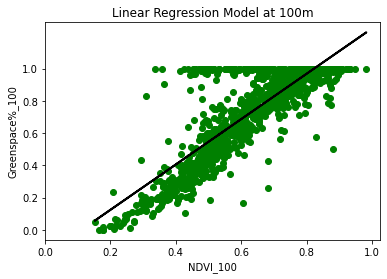

In [10]:
# plot outputs
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/lm_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 1.2. Generalized Additive Model (GAM)

In [36]:
# define the data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Put the target Greenspace%_100 in another DataFrame
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

In [39]:
# define X and Y
X = df_100
y = target_100

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
gam_100 = LinearGAM(s(0, n_splines=4)).fit(X_train, y_train, weights=None)
#gam_100 = gam_100.gridsearch(X_train, y_train)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.5101
Link Function:                     IdentityLink Log Likelihood:                                -87366.4689
Number of Samples:                         4702 AIC:                                           174739.9581
                                                AICc:                                          174739.9649
                                                GCV:                                                0.0234
                                                Scale:                                              0.0233
                                                Pseudo R-Squared:                                   0.6955
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2108/1769807465.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [13]:
# plot outpus
#XX = gam_100.generate_X_grid(term=0)
#plt.rcParams['figure.figsize'] = (8, 8)
#fig, axs = plt.subplots(1, 1)
#titles = ['Generalized Additive Model (GAM) at 100m']
#pdep, confi = gam_100.partial_dependence(XX, term=0, features = 1, width=0.95)
#ax.plot(XX[:, 1], pdep)
#ax.plot(XX[:, 1], confi[0][:, 0], c='grey', ls='--')
#ax.plot(XX[:, 1], confi[0][:, 1], c='grey', ls='--')
#ax.set_title(titles, fontsize=26)
#plt.show()

In [40]:
# convert X_test and y_test to array values
y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

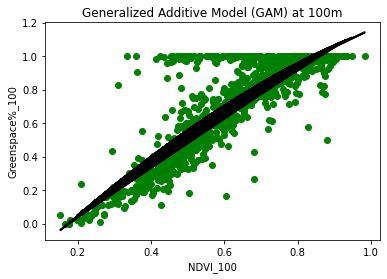

In [41]:
# plot output
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/gam_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 2. Modelling Greenspace Metrics at 300m

In [16]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/greenspace_metrics_300_gm.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,geometry
0,0.485173,0.528844,0.442425,POINT (384713.357 394255.209)
1,0.285426,0.293025,0.247789,POINT (387034.589 396075.398)
2,0.462789,0.462798,0.464153,POINT (395300.134 404726.178)
3,0.594440,0.987531,0.225635,POINT (369879.786 397440.240)
4,0.584577,0.532749,0.220658,POINT (356385.617 406274.434)


### 2.1. Linear Regression Model

In [17]:
# define the data/predictors as the NDVI_300
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Put the target Greenspace%_300 in another DataFrame
target = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

In [18]:
# define X and y
X = df
y = target['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [19]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', lm_300.coef_)
print('Intercept:', lm_300.intercept_)
print('R-squared:', lm_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [1.1359718]
Intercept: 0.02219447548085196
R-squared: 0.6921249306453257


In [20]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3861,0.889216,0.590199
2812,0.955741,0.999274
5593,0.442450,0.554518
5228,0.889422,0.760154
1161,0.555974,0.668333
...,...,...
2058,0.955125,1.000765
1763,0.800356,0.855422
899,0.900247,0.928889
3083,0.798369,0.807288


In [21]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08934573648402441
Mean Squared Error: 0.01610827472555938
Root Mean Squared Error: 0.1269183782025258


In [22]:
# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values
X_test

array([[0.5000161 ],
       [0.86012644],
       [0.46860594],
       ...,
       [0.79816608],
       [0.69112099],
       [0.53722871]])

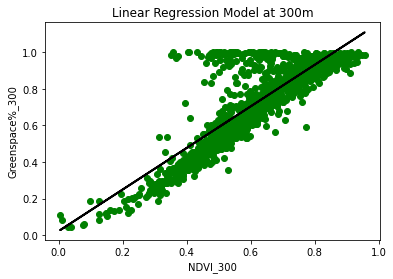

In [23]:
# plot outputs
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Greenspace%_300')

# save the figure
plt.savefig('thesis_project/visualizations/lm_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 2.2. Generalized Additive Model (GAM)

In [24]:
# define dependent and independent variables
ndvi_300 = pd.Series(gdf_300.NDVI_300)
green_300 = pd.Series(gdf_300['Greenspace%_300'])
green_300
#ndvi_300.head()

0       0.528844
1       0.293025
2       0.462798
3       0.987531
4       0.532749
          ...   
5776    0.454508
5777    0.927994
5778    0.988490
5779    0.635722
5780    0.656344
Name: Greenspace%_300, Length: 5781, dtype: float64

In [25]:
# define X and Y
x = ndvi_300
y = green_300

# fit GAM
gam_300 = LinearGAM(n_splines=25).fit(x, y, weights=None)
#gam = LinearGAM(s(0) + s(1) + f(2))


# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.3703
Link Function:                     IdentityLink Log Likelihood:                               -170151.6949
Number of Samples:                         5781 AIC:                                           340344.1305
                                                AICc:                                          340344.2816
                                                GCV:                                                0.0153
                                                Scale:                                              0.0152
                                                Pseudo R-Squared:                                   0.7225
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2108/3379528597.py:11: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


## 3. Modelling Greenspace Metrics at 500m

In [26]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/greenspace_metrics_500_gm.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,geometry
0,0.502140,0.485566,0.339339,POINT (372673.972 394848.116)
1,0.634665,0.641850,0.181328,POINT (383073.527 408838.647)
2,0.606910,0.969945,0.164166,POINT (372549.883 390299.040)
3,0.719913,0.824603,0.294875,POINT (372644.583 414079.514)
4,0.710023,0.980069,0.031487,POINT (369449.827 413462.285)


### 3.1. Linear Regression Model

In [27]:
# define the data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Put the target Greenspace%_500 in another DataFrame
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

In [28]:
# define X and y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [29]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', lm_500.coef_)
print('Intercept:', lm_500.intercept_)
print('R-squared:', lm_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [1.10297259]
Intercept: 0.016788191733490554
R-squared: 0.6732817510651916


In [30]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
569,0.998629,0.582432
2172,0.877040,0.885732
2423,0.987556,0.424431
2245,0.153858,0.225730
1804,0.959479,0.781882
...,...,...
2308,0.498985,0.600743
2438,0.835860,0.883347
878,0.853339,0.872549
1526,0.606549,0.639425


In [31]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08462592877548988
Mean Squared Error: 0.015352208136519737
Root Mean Squared Error: 0.12390402792693923


In [32]:
# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values
X_test

array([[0.51283622],
       [0.7878195 ],
       [0.36958535],
       [0.18943556],
       [0.6936657 ],
       [0.43889258],
       [0.55459005],
       [0.71870588],
       [0.37070707],
       [0.51099902],
       [0.38739358],
       [0.57787744],
       [0.68819916],
       [0.72881986],
       [0.62623317],
       [0.8336598 ],
       [0.64584299],
       [0.79268429],
       [0.70053494],
       [0.37946576],
       [0.6209584 ],
       [0.31214585],
       [0.28758237],
       [0.06706043],
       [0.51171853],
       [0.64706683],
       [0.14443741],
       [0.26036025],
       [0.72332401],
       [0.5799473 ],
       [0.47701697],
       [0.6394508 ],
       [0.39817285],
       [0.73196357],
       [0.70099815],
       [0.4957497 ],
       [0.47858355],
       [0.6504883 ],
       [0.58012617],
       [0.67455455],
       [0.74002384],
       [0.32640198],
       [0.55060632],
       [0.98070881],
       [0.72761258],
       [0.64339106],
       [0.39544505],
       [0.808

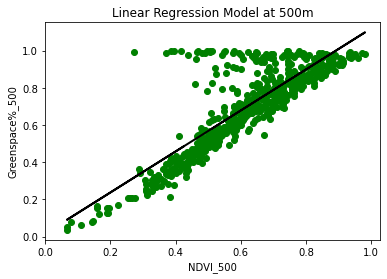

In [33]:
# plot outputs
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Greenspace%_500')

# save the figure
plt.savefig('thesis_project/visualizations/lm_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 3.2. Generalized Additive Model (GAM)

In [34]:
# define dependent and independent variables
ndvi_500 = pd.Series(gdf_500.NDVI_500)
green_500 = pd.Series(gdf_500['Greenspace%_500'])
green_500
#ndvi_500.head()

0       0.485566
1       0.641850
2       0.969945
3       0.824603
4       0.980069
          ...   
2876    0.557591
2877    0.824207
2878    0.535894
2879    0.777491
2880    0.482798
Name: Greenspace%_500, Length: 2881, dtype: float64

In [35]:
# define X and Y
x = ndvi_500
y = green_500

# fit GAM
gam_500 = LinearGAM(n_splines=25).fit(x, y, weights=None)


# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     18.0494
Link Function:                     IdentityLink Log Likelihood:                                -85701.5783
Number of Samples:                         2881 AIC:                                           171441.2554
                                                AICc:                                          171441.5224
                                                GCV:                                                0.0152
                                                Scale:                                               0.015
                                                Pseudo R-Squared:                                   0.7024
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:593: RuntimeWarning: invalid value encountered in reciprocal
  weights ** -1)**-0.5)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:86: RuntimeWarning: invalid value encountered in reciprocal
  return (np.sum(weights * self.V(mu)**-1 * (y - mu)**2) /
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2108/1902299840.py:11: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()
